# Demonstration of the `experiment_info` Dictionary

In [1]:
import os
import sys
import importlib

import matplotlib.pyplot as plt
import pandas as pd


# Absolute path to MaCFP matl repository:
# "D:\Git\MaCFP_matl_MyFork\matl-db"
macfp_matl_root = os.path.join("..")
# macfp_matl_root = os.path.join("d:/", "Git", "MaCFP_matl", "matl-db")


# Add path to where Python looks for modules to import..
base_func_script = os.path.join(macfp_matl_root, "Utilities")
sys.path.insert(1, base_func_script)

# Import base_functions script.
import basic_functions as base_f
# Re-import base_functions script 
# (neccessary for changes to take effect without kernel restart).
importlib.reload(base_f)

# Import of the Python file with the experiment information dictionary.
import ExperimentInformation as exp_info
importlib.reload(exp_info)
# Make the name nicer, just conveniance...
# tga_exp_info = exp_info.matl_db_info["TGA"]

<module 'ExperimentInformation' from '..\\Utilities\\ExperimentInformation.py'>

In [2]:
# Import general information needed for this notebook.

# Path to the PMMA data.
pmma_path = os.path.join(macfp_matl_root, "Non-charring", "PMMA")

In [3]:
# Get a list of institutes that provided data of TGA experiments.
institutes = list(exp_info.matl_db_info["TGA"].keys())
institutes

['DBI_Lund',
 'GIDAZE+',
 'HKPoly',
 'LCPP',
 'NIST',
 'SANDIA',
 'TIFP',
 'UClan',
 'UDRI',
 'UMD',
 'UMET',
 'UQ']

DBI_Lund_STA_N2_20K_1
DBI_Lund_STA_N2_20K_2
DBI_Lund_STA_N2_20K_3
LCPP_STA_N2_20K_1
LCPP_STA_N2_20K_2
LCPP_STA_N2_20K_3
UMET_TGA_N2_20K_1


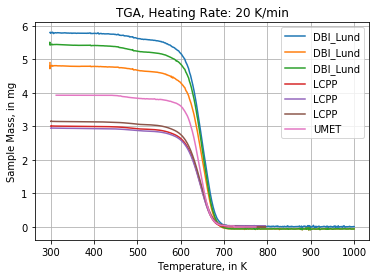

In [4]:
# Iterate over all institutes that provided TGA data.
for institute in institutes:
    # Get the respective test labels.
    test_labels = list(exp_info.matl_db_info["TGA"][institute].keys())
    
    # Check if the test labels contains a certain heating rate.
    for test_label in test_labels:
        if "_20K_" in test_label:
            print(test_label)
            
            # Get the data file path within the repo.
            data_file = exp_info.matl_db_info["TGA"][institute][test_label]["path"]
            data_file_path = os.path.join(macfp_matl_root,
                                          data_file)
            
            # Read CSV file as DataFrame.
            # Skip first row because of unit symbols.
            data_df = pd.read_csv(data_file_path,
                                  skiprows=[1])
            
            # Plot the respective data series.
            plt.plot(data_df["Temperature"],
                     data_df["Mass"], 
                     label=institute)
            

            
plt.title("TGA, Heating Rate: 20 K/min")
plt.xlabel("Temperature, in K")
plt.ylabel("Sample Mass, in mg")

plt.legend()
plt.grid()